# 交叉随机基准测试

交叉随机基准测试协议可以概括如下步骤：

1. 选择我们想要表征作用于量子比特集 $Q$ 的门 $G$。
2. 在量子比特 $Q$ 上运行随机基准测试并估计随机基准测试的衰减参数。
3. 生成另一组序列，其中门 $G$ 在每个序列中交错出现。完全像运行随机基准测试一样运行这些序列并估计随机基准测试的衰减参数，我们称之为交叉随机基准测试的衰减参数。由于门 $G$ 的额外应用的影响，我们预计该参数将小于随机基准测试的衰减参数。
4. 使用这两个衰减参数来计算门 $G$ 上的误差。我们还可以得到门 $G$ 保真度的下限和上限。

In [1]:
import numpy as np
from qiskit_experiments.library import InterleavedRB
import qiskit.circuit.library as circuits

from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakePerth

构建含噪qiskit量子后端。

In [2]:
backend = AerSimulator.from_backend(FakePerth())

设置交叉随机基准测试的参数。

In [3]:
lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = (1, 2)

考虑随机插入CNOT门（又称CX门），来估计单个CNOT门作用引入的去极化参数。

In [4]:
# The interleaved gate is the CX gate
int_exp2 = InterleavedRB(
    circuits.CXGate(), qubits, lengths, num_samples=num_samples, seed=seed)

int_expdata2 = int_exp2.run(backend).block_for_results()
int_results2 = int_expdata2.analysis_results()

显示结果，其中包含两条曲线，其中一条是通过普通的randomized benchmarking获得的衰减参数，另一条是通过交叉随机基准测试获得的衰减参数。

二者衰减指数相除，得到的将会是CNOT门对应的去极化参数。

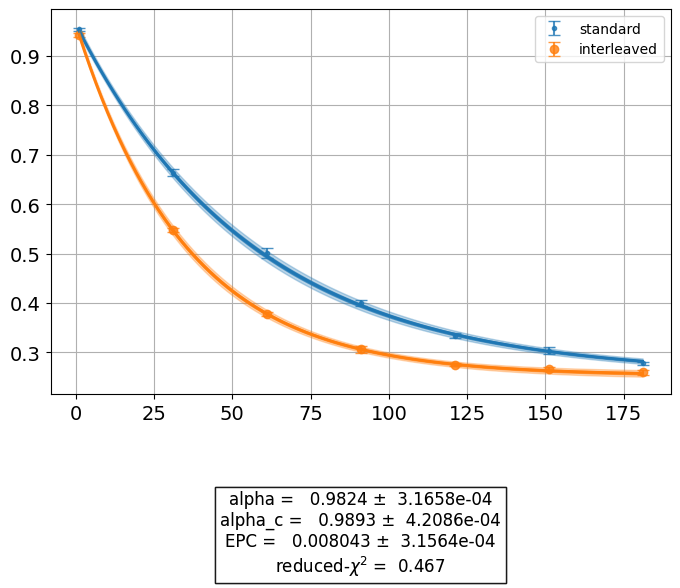

AnalysisResult
- name: @Parameters_InterleavedRBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 2
  * F_standard(x) = a * alpha ** x + b
  * F_interleaved(x) = a * (alpha_c * alpha) ** x + b
 - success: True
 - number of function evals: 25
 - degree of freedom: 10
 - chi-square: 4.669510272076746
 - reduced chi-square: 0.46695102720767456
 - Akaike info crit.: -7.3720438231688625
 - Bayesian info crit.: -4.815814504707829
 - init params:
  * a = 0.7128302828550261
  * alpha = 0.9822389109765747
  * b = 0.25
  * alpha_c = 0.994189975463775
 - fit params:
  * a = 0.7106969299640414 ± 0.0033625457952607078
  * alpha = 0.9824327766816952 ± 0.00031657693351373045
  * b = 0.25363402388759115 ± 0.002470085875051852
  * alpha_c = 0.98927578080622 ± 0.0004208553535174613
 - correlations:
  * (alpha, b) = -0.6417769565075675
  * (a, b) = -0.6179338658207676
  * (b, alpha_c) = -0.24725492862180243
  * (alpha, alpha_c) = -0.24403617209505155
  * (a, alph

In [5]:
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

可以看到，上述结果拟合了两个内容：
  * F_standard(x) = a * alpha ** x + b
  * F_interleaved(x) = a * (alpha_c * alpha) ** x + b
  
即alpha_c为插入clifford门的去极化参数，则上述CNOT门的去极化参数为：

In [6]:
int_results2[2].value

0.98927578080622+/-0.0004208553535174613